# basic test for brib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi
print("rexpi version = %s" % rexpi.__version__)

rexpi version = 0.0.4


### define setup

In [2]:
n=5
tol=1e-8
w = rexpi.west(n, tol)
wmax = (n+1)*np.pi
print("use n = %d and w = %f (max w \u2248%.2f). computed for error objective epsilon = %.2e"%(n,w,wmax,tol))

use n = 5 and w = 2.855711 (max w ≈18.85). computed for error objective epsilon = 1.00e-08


### compute best approximation

In [3]:
r, info = rexpi.brib(w,n,info=1)
print("used %d iterations, error = %.2e, deviation = %.2e"%(info['iterations'],info['err'],info['dev']))

used 5 iterations, error = 1.00e-08, deviation = 2.34e-05


# generate various plots
### plot approximation error on [-1,1]

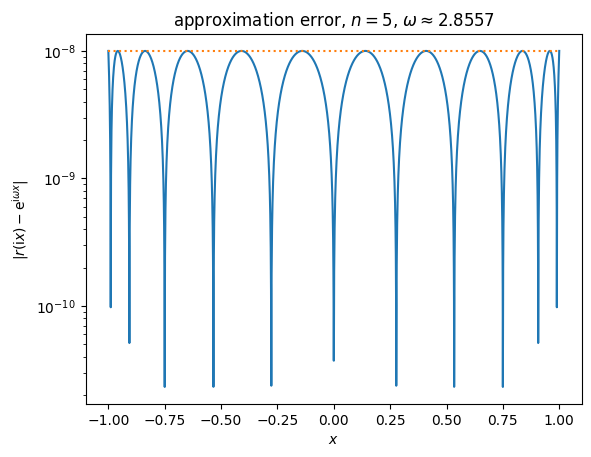

In [4]:
xs = np.linspace(-1,1,3000)
err = r(1j*xs)-np.exp(1j*w*xs)
errmax = np.max(abs(err))
plt.semilogy(xs,abs(err),[-1,1],[errmax,errmax],':');
plt.ylabel("$|r(\mathrm{i}x)-\mathrm{e}^{\mathrm{i}\omega x}|$")
plt.xlabel("$x$");
plt.title("approximation error, $n=%d$, $\omega\\approx %.4f$"%(n,w));

### plot phase error on [-1,1]

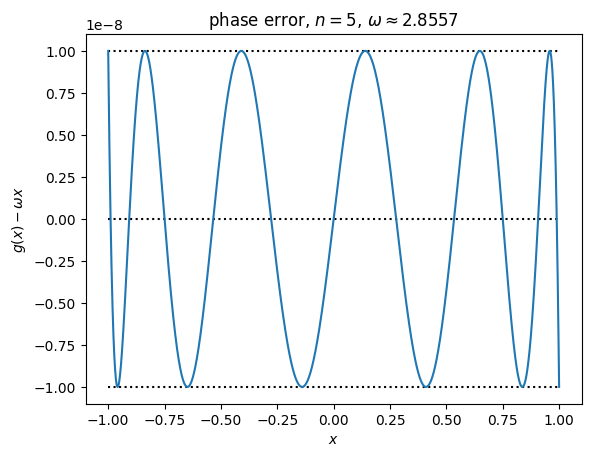

In [5]:
phaseerr = np.angle(r(1j*xs)/np.exp(1j*w*xs))
phaseerrmax = max(abs(phaseerr))
plt.plot([-1,1],[0,0],'k:',[-1,1],[phaseerrmax,phaseerrmax],'k:',[-1,1],[-phaseerrmax,-phaseerrmax],'k:')
plt.plot(xs,phaseerr);
plt.ylabel("$g(x)-\omega x$")
plt.xlabel("$x$");
plt.title("phase error, $n=%d$, $\omega\\approx%.4f$"%(n,w));
#plt.savefig("phaseerror.png")

### plot error path in complex plane
error at points of equioscillating phase error is numbered in ascending order

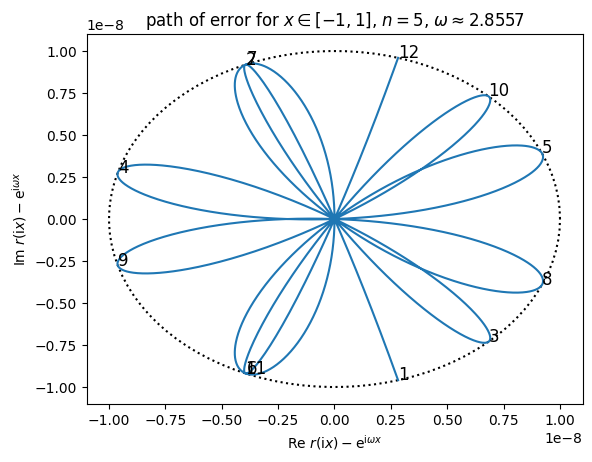

In [6]:
pcirc=np.linspace(0,2*np.pi,100)
plt.plot(errmax*np.cos(pcirc),errmax*np.sin(pcirc),'k:')
plt.plot(np.real(err),np.imag(err));
for j,eta in enumerate(info['eta']):
    erreta = r(1j*eta)-np.exp(1j*w*eta)
    plt.text(erreta.real, erreta.imag, str(j+n+2), fontsize=12)
    plt.text(erreta.real, -erreta.imag, str(n+1-j), fontsize=12)
plt.title("path of error for $x\in[-1,1]$, $n=%d$, $\omega\\approx %.4f$"%(n,w))
plt.ylabel("Im $r(\mathrm{i} x)-\mathrm{e}^{\mathrm{i}\omega x}$")
plt.xlabel("Re $r(\mathrm{i} x)-\mathrm{e}^{\mathrm{i}\omega x}$");


### plot error in complex plane

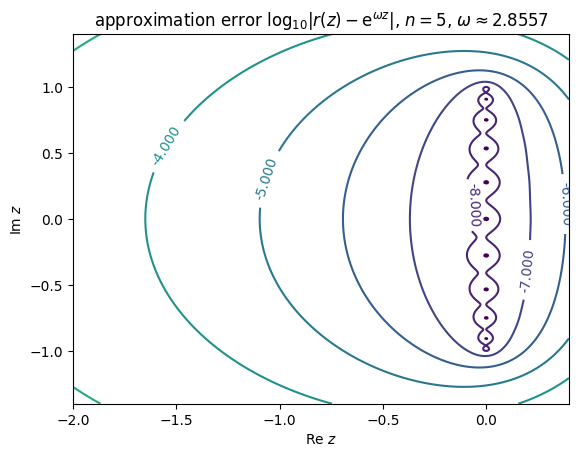

In [7]:
nim=5000
nre=551
ximag = np.linspace(-1.4, 1.4, nim)
xreal = np.linspace(-2.0, 0.4, nre)
X, Y = np.meshgrid(xreal, ximag)
zall = (X+1j*Y).flatten()

# evaluate in barycentric rational form
rz = r(zall)
errorvec = np.log10(abs(rz-np.exp(w*zall)))

# evaluate in product form
#poles = r.getpoles()
#rz = rexpi.evalr_product_scalar(zall, poles)
#errorvec = np.log10(abs(rz-np.exp(w*zall)))

# evaluate in partial fraction form
#a0, aj, sj = r.getpartialfractioncoef(sym=True)
#rz = rexpi.evalr_partialfraction_scalar(zall, aj, sj)
#errorvec = np.log10(abs(rz-np.exp(w*zall)))

Z = np.reshape(errorvec,(nim,nre))

fig, ax = plt.subplots()
reftol = int(np.log10(tol))-1
CS = ax.contour(X, Y, Z, levels=list(range(reftol,2)))
ax.clabel(CS, inline=1, fontsize=10)
plt.ylabel("Im $z$")
plt.xlabel("Re $z$");
plt.title("approximation error $\log_{10}|r(z)-\mathrm{e}^{\omega z}|$, $n=%d$, $\omega\\approx %.4f$"%(n,w));

### plot poles in complex plane

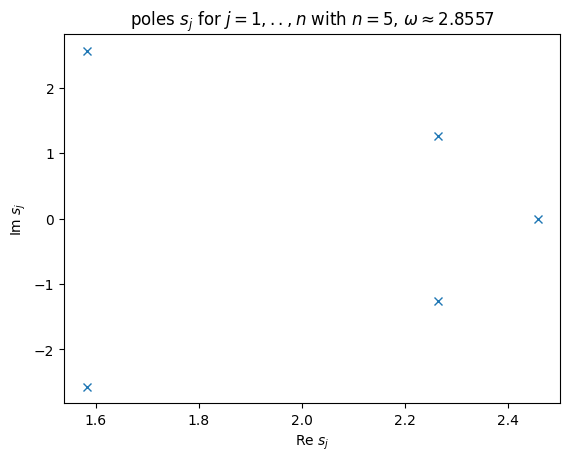

In [8]:
sj = r.getpoles(sym=True)
plt.plot(sj.real,sj.imag,'x')
plt.ylabel("Im $s_j$")
plt.xlabel("Re $s_j$");
plt.title("poles $s_j$ for $j=1,..,n$ with $n=%d$, $\omega\\approx %.4f$"%(n,w));